### 使用梯度上升法求解成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0, 10., size=100)

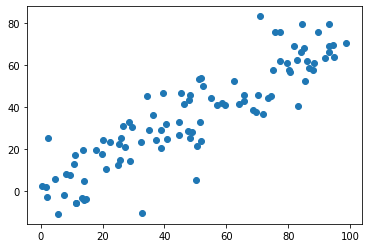

In [3]:
plt.scatter(X[:, 0], X[:, 1])

demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

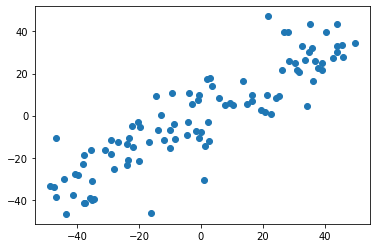

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [7]:
np.mean(X_demean[:, 0])

-1.4850343177386093e-14

In [8]:
np.mean(X_demean[:, 1])

3.694822225952521e-15

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, x) - f(w_2, x)) / (2 * epsilon)
    return res

In [14]:
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
    return w